# C04

|CO4 |15. 12. 2017|
|:------|:------|
|Development time| 60s  |
|Focus correction| 0  |
|Dose|145 mJ|
|Quality| Normal  |
|Wires| 1.2 um|
|Gaps|1.2|
|Photoresist| only Shipley  |


## Four pictures approximatelly from the midle of the structure:
<img src='images/M_C_01.jpg' width=400>
<img src='images/M_C_02.jpg' width=400>
<img src='images/M_C_03.jpg' width=400>
<img src='images/M_C_04.jpg' width=400>

# Periodicity analysis
in the vertical direction (perpendicular to the wires)

In [1]:
import os
import math as m
import numpy as np
from copy import copy

# %matplotlib notebook
%matplotlib inline
import tools as tl
# from skimage import data, io, filters, util
from skimage import io

import IPython
import matplotlib
import matplotlib.pyplot as plt
# from skimage.color import rgb2gray

from scipy import signal



In [2]:
#image load
rawl=list()
for i in range(1,5):
    rawl.append(io.imread('images/M_C_0{}.jpg'.format(i)))

In [3]:
gaps=list()
for r in rawl:
    gaps.append(tl.wires_analysis(r, False))

### Example of detected wires
method that recognises the wires in the image (wires must be paralel to the edge of the image) and afterwards returns widths of the wires and gaps

widths of wires [px]: [1, 20, 21, 20, 19, 20, 21, 21, 20, 20, 20, 21, 20, 19, 20, 21, 21, 20, 20, 21, 20, 20, 20, 21, 20, 20, 19, 21, 21, 19, 19, 20, 22, 20, 19, 21, 20]
widths of gaps [px]: [12, 14, 14, 13, 12, 13, 14, 13, 12, 13, 16, 13, 12, 13, 14, 13, 11, 12, 15, 14, 12, 12, 14, 14, 13, 12, 15, 14, 12, 12, 15, 14, 12, 12, 14, 15]
average width: 1.413 um
average distance: 0.947 um
std width: 0.230 um
std distance: 0.084 um
together: 2.360 um


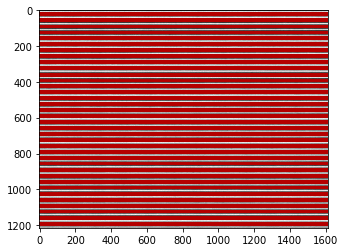

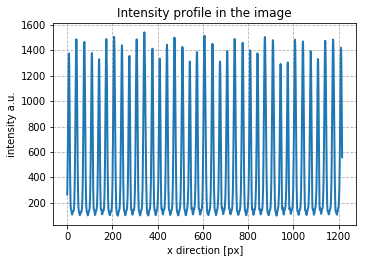

In [4]:
out=tl.wires_analysis(rawl[0], True)

## Width of the gaps between wires

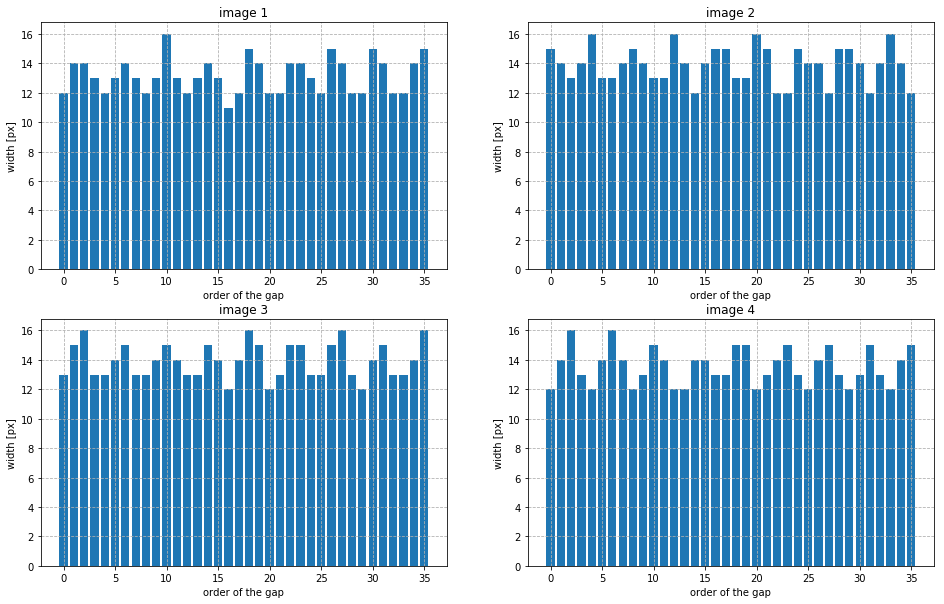

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10)) 

i=0
for axe in axes:
    for ax in axe:
        ax.grid(linestyle='--') 
        ax.set_title('image {}'.format(i+1))
        ax.set_xlabel('order of the gap')
        ax.set_ylabel('width [px]')

        ax.bar(np.arange(len(gaps[i][1])), gaps[i][1], linewidth=2)    
        i+=1

# Spectral analysis
=> the period of the variation of the width is 4 units (one unit is wire+gap)


In [11]:
f=[[] for i in range(4)]
p=[[] for i in range(4)]
for i in range(4):
    f[i], p[i] = signal.periodogram(gaps[i][1], 1)
    
    print('major frequency (image {}): {}'.format(i+1 ,f[0][list(p[0]).index(max(p[0]))]))


major frequency (image 1): 0.25
major frequency (image 2): 0.25
major frequency (image 3): 0.25
major frequency (image 4): 0.25


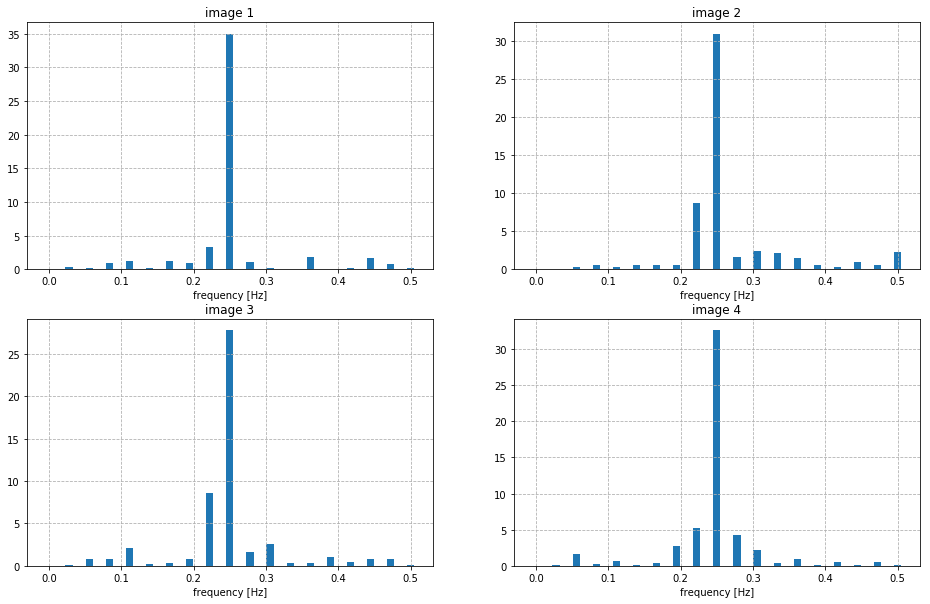

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10)) 

i=0
for axe in axes:
    for ax in axe:
        ax.grid(linestyle='--') 
        ax.set_title('image {}'.format(i+1))
        ax.set_xlabel('frequency [Hz]')
        ax.set_ylabel('')

        ax.bar(f[i], p[i], width=0.01)    
        i+=1